# Percolation Group 1

### Always run this cell before working on the code

In [5]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt

## 1 (core)

In [6]:

def display_rand_grid(grid_size, p_yellow):
    '''
    A function to display a random square grid of blue and yellow squares.
    First argument is the side length and the second is the probability that a square is yellow
    '''

    colours = np.random.rand(grid_size, grid_size)  # Initialise 2d array of random numbers between 0 and 1
    colours = colours < p_yellow  # Sets each cell to 1 if it's less than p_yellow, else 0.

    plt.figure(figsize=(6,6))  #set appropriate figure size
    plt.title("probability = " + str(p_yellow))  # Adds title showing probability of a point being filled yellow
    plt.pcolor(colours, cmap="plasma")  # Makes the graph a rectangular grid plot with yellow and blue colour scheme
    plt.gca().set_aspect('equal')   #set equal aspect ratio
    plt.plot() #Plots the grid
    plt.show()
    return colours
    
def display_grid(grid):
    
    plt.figure(figsize=(6,6))  #set appropriate figure size
    plt.pcolor(grid, cmap="plasma")  # Makes the graph a rectangular grid plot with yellow and blue colour scheme
    plt.gca().set_aspect('equal')   #set equal aspect ratio
    plt.plot() #Plots the grid
    plt.show()
    return None
    

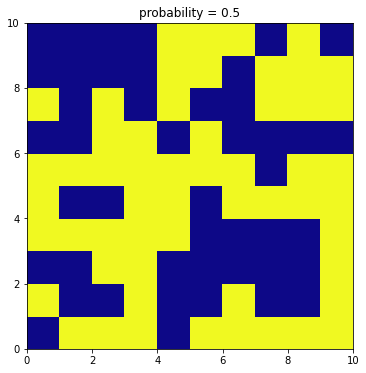

In [76]:
mygrid = display_rand_grid(10, 0.5)

In [8]:
def generate_grid(grid_size, p_yellow):
    '''
    Given grid size and probability of a square being yellow, this outputs
    a numpy array of booleans, with true representing yellow
    '''
    
    colours = np.random.rand(grid_size, grid_size)  # Initialise 2d array of random numbers between 0 and 1
    colours = colours < p_yellow  # Sets each cell to 1 if it's less than p_yellow, else 0.
    return colours
    
    

## 2 (core)

In [71]:
def find_yellow_path(grid,show_path=False):
    '''
    For a numpy array of booleans (the yellow/blue grid), this function returns True or False
    depending on whether or not a yellow path exists from the left to the right edge.
    It will also display the path if you pass True
    This is not efficient
    '''
    
    #we know all the yellows on the left are reachable
    grid_size = np.shape(grid)
    side_length = grid_size[0]
    #we make an array of the same size as the grid to store
    #which squares we can reach. Initially we assume we can't reach any
    #0 represents a square is unreachable
    reachable = np.full(grid_size, 0)
    #yellows is a list of arrays which contain the coordinates of each yellow square
    yellows = tuple(np.argwhere(grid == True))
    #storing all the 0th column yellows as reachable
    #1 represents a square is reachable
    for square in yellows:
        y,x = square
        if x == 0:
            reachable[y,x] = 1
    
    #now we search for adjacent yellow squares to the ones we already have
    #we keep searching through each element of reachable until we don't find any new squares
    end = False
    while end == False:
        #the counter keeps track of how many new reachable squares are found
        #every time the loop below repeats
        counter = 0
        for i in range(side_length):
            for j in range(side_length):
                if reachable[i,j] == 1:
                    #check adjacent
                    #the first ifs in each part stops us getting index out of bounds errors
                    #we check !=1 because otherwise we'd find the same squares again
                    #and it would loop forever
                    if i-1>=0:
                        #checks above
                        if grid[i-1,j] == True and reachable[i-1,j] != 1:
                            reachable[i-1,j] = 1
                            counter+=1
                    if i<side_length-1:
                        #checks below
                        if grid[i+1,j] == True and reachable[i+1,j] != 1:
                            reachable[i+1,j] = 1
                            counter+=1
                    if j-1>=0:
                        #checks left
                        if grid[i,j-1] == True and reachable[i,j-1] != 1:
                            reachable[i,j-1] = 1
                            counter+=1
                    if j<side_length-1:
                        #checks right
                        if grid[i,j+1] == True and reachable[i,j+1] != 1:
                            reachable[i,j+1] = 1
                            counter+=1
        #if no new squares are found, the while loop ends
        if counter == 0:
            end = True
                            
    if show_path == True:
        display_grid(reachable)
    
    #this sums the last column of reachable
    #if the sum is 0, then all the squares are unreachable
    #if >0, there must be a reachable square on the RHS
    if sum(reachable[:,side_length-1]) > 0:
        return True
    else:
        return False
    
    
    
  
        
    

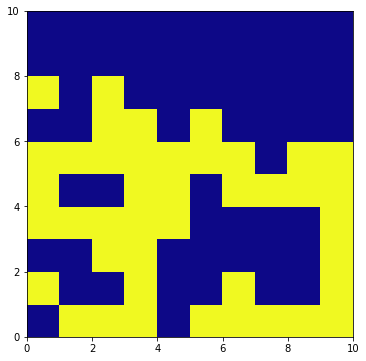

True

In [77]:
find_yellow_path(mygrid,True)


In [38]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
A[2,1]

8